<a href="https://colab.research.google.com/github/MohammadJavadSoltani/Analytical_Photogrammetry/blob/main/Spatial_Filtering%2C_noise_reduction_and_Edge_detection_NoOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

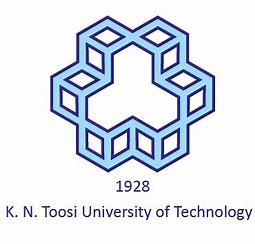

# Spatial Filtering and noise reduction , Also Edge detection
mohammad javad soltani ;

KNTU;


[![Open In Colab](https://colab.research.google.com/drive/1HYZl8ZTKCcppPFuABFnn2EvWw13RsNQo?usp=sharing)](https://github.com/MohammadJavadSoltani/Spatial-Filtering_noise-reduction_Edge-detection/blob/main/Spatial_Filtering_and_noise_reduction_%2C_Also_Edge_detection.ipynb)


# *Q1; *    
   **Apply low-pass filters and remove noise**

add up all libraes that we need:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage import filters
from skimage.morphology import rectangle


add the picture:

In [ ]:
#from google.colab import files
#img1 = files.upload()
img1 = cv2.imread('first_image.jfif')
print(np.shape(img1))




---

add salt and peper noise

In [ ]:
sp_noise = random_noise(img1,mode='s&p',amount=.15)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1);plt.imshow(img1[:,:,0],cmap='gray');plt.xlabel('normal pic ( band 0 )')
plt.subplot(1,2,2);plt.imshow(sp_noise[:,:,0],cmap='gray');plt.xlabel('salt & peper noise( band 0 )')
plt.figure(figsize=(20,20))
plt.subplot(1,2,1);plt.imshow(img1[:,:,1],cmap='gray');plt.xlabel('normal pic ( band 1 )')
plt.subplot(1,2,2);plt.imshow(sp_noise[:,:,1],cmap='gray');plt.xlabel('salt & peper noise( band 1 )')
plt.figure(figsize=(20,20))
plt.subplot(1,2,1);plt.imshow(img1[:,:,2],cmap='gray');plt.xlabel('normal pic ( band 2 )')
plt.subplot(1,2,2);plt.imshow(sp_noise[:,:,2],cmap='gray');plt.xlabel('salt & peper noise( band 2 )')

i gess the band 0 is better for our work.



---

now gussian noise:

In [ ]:
gussian = np.random.normal(.1,.7,img1.size)
gussian = gussian.reshape(img1.shape[0], img1.shape[1], img1.shape[2]).astype('uint8')
guss_noise = cv2.add(img1, gussian)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1);plt.imshow(img1[:,:,0],cmap='gray');plt.xlabel('normal pic ( band 0 )')
plt.subplot(1,3,2);plt.imshow(sp_noise[:,:,0],cmap='gray');plt.xlabel('salt & peper noise( band 0 )')
plt.subplot(1,3,3);plt.imshow(guss_noise[:,:,0],cmap='gray');plt.xlabel('guss_noise pic ( band 0 )')
plt.figure(figsize=(20,20))
plt.subplot(1,3,1);plt.imshow(img1[:,:,1],cmap='gray');plt.xlabel('normal pic ( band 1 )')
plt.subplot(1,3,2);plt.imshow(sp_noise[:,:,1],cmap='gray');plt.xlabel('salt & peper noise( band 1 )')
plt.subplot(1,3,3);plt.imshow(guss_noise[:,:,1],cmap='gray');plt.xlabel('guss_noise pic ( band 1 )')
plt.figure(figsize=(20,20))
plt.subplot(1,3,1);plt.imshow(img1[:,:,2],cmap='gray');plt.xlabel('normal pic ( band 2 )')
plt.subplot(1,3,2);plt.imshow(sp_noise[:,:,2],cmap='gray');plt.xlabel('salt & peper noise( band 2 )')
plt.subplot(1,3,3);plt.imshow(guss_noise[:,:,2],cmap='gray');plt.xlabel('guss_noise pic ( band 2 )')


The difference betwen 'salt and peper' and 'gussian' in band 2 is obvious.

---



🔷now we use filters for salt and peper noise🧂🌶 comparring with gussian

In [ ]:
mean3 = cv2.blur(sp_noise[:,:,0], ksize=(3,3))
med3 = filters.median(sp_noise[:,:,0], selem=rectangle(3,3))
guss1 = filters.gaussian(sp_noise[:,:,0],sigma=1)
plt.figure(figsize=(30,30))
plt.subplot(1,3,1);plt.imshow(mean3,cmap='gray');plt.xlabel('mean fiter(3*3) for salt and peper noise ( band 0 )')
plt.subplot(1,3,2);plt.imshow(med3,cmap='gray');plt.xlabel('median filter (3*3) for salt and peper noise ( band 0 )')
plt.subplot(1,3,3);plt.imshow(guss1,cmap='gray');plt.xlabel('gussian filter sigma=1 for salt and peper noise ( band 0 )')

#now for gussian
mean3_G = cv2.blur(guss_noise[:,:,0], ksize=(3,3))
med3_G = filters.median(guss_noise[:,:,0], selem=rectangle(3,3))
guss1_G = filters.gaussian(guss_noise[:,:,0],sigma=1)
plt.figure(figsize=(30,30))
plt.subplot(1,3,1);plt.imshow(mean3_G,cmap='gray');plt.xlabel('mean fiter(3*3) for gussian noise ( band 0 )')
plt.subplot(1,3,2);plt.imshow(med3_G,cmap='gray');plt.xlabel('median filter (3*3) for gussian noise ( band 0 )')
plt.subplot(1,3,3);plt.imshow(guss1_G,cmap='gray');plt.xlabel('gussian filter sigma=1 for gussian noise ( band 0 )')

1.   as we know and by comparing the filtering algorithm,in salt and peper ,

    median filter is way better than average and gussian filter.

    also the average filter did not give us a good result at all and in Gaussian the bluring is very high and noises can still be detect.


2.   about gussian noioze again median filter did a wonderfull jub!

    maybe better than elimination salt and peper noize.

    yet still average is off the table and gussian is better than previous one ,

    but still noizy.



---



🔷now for 5*5 filters

In [ ]:
mean5 = cv2.blur(sp_noise[:,:,0], ksize=(5,5))
med5 = filters.median(sp_noise[:,:,0], selem=rectangle(5,5))
guss5 = filters.gaussian(sp_noise[:,:,0],sigma=2)
plt.figure(figsize=(30,30))
plt.subplot(1,3,1);plt.imshow(mean5,cmap='gray');plt.xlabel('mean fiter(5*5) for salt and peper noise ( band 0 )')
plt.subplot(1,3,2);plt.imshow(med5,cmap='gray');plt.xlabel('median filter (5*5) for salt and peper noise ( band 0 )')
plt.subplot(1,3,3);plt.imshow(guss5,cmap='gray');plt.xlabel('gussian filter sigma=2 for salt and peper noise ( band 0 )')

#now for gussian
mean5_G = cv2.blur(guss_noise[:,:,0], ksize=(5,5))
med5_G = filters.median(guss_noise[:,:,0], selem=rectangle(5,5))
guss5_G = filters.gaussian(guss_noise[:,:,0],sigma=2)
plt.figure(figsize=(30,30))
plt.subplot(1,3,1);plt.imshow(mean5_G,cmap='gray');plt.xlabel('mean fiter(5*5) for gussian noise ( band 0 )')
plt.subplot(1,3,2);plt.imshow(med5_G,cmap='gray');plt.xlabel('median filter (5*5) for gussian noise ( band 0 )')
plt.subplot(1,3,3);plt.imshow(guss5_G,cmap='gray');plt.xlabel('gussian filter sigma=2 for gussian noise ( band 0 )')

in here we can slightly see bluring.and also in gussian noiz average and gussian are doing better than salt and peper.but of course not enough.

i gess in gussian noize and a 5*5 gussian filter we have the best result of gussian filter in gussian noize.

---



🔷now for 7*7 filters

In [ ]:
mean7 = cv2.blur(sp_noise[:,:,0], ksize=(7,7))
med7 = filters.median(sp_noise[:,:,0], selem=rectangle(7,7))
guss7 = filters.gaussian(sp_noise[:,:,0],sigma=3)
plt.figure(figsize=(30,30))
plt.subplot(1,3,1);plt.imshow(mean7,cmap='gray');plt.xlabel('mean fiter(7*7) for salt and peper noise ( band 0 )')
plt.subplot(1,3,2);plt.imshow(med7,cmap='gray');plt.xlabel('median filter (7*7) for salt and peper noise ( band 0 )')
plt.subplot(1,3,3);plt.imshow(guss7,cmap='gray');plt.xlabel('gussian filter sigma=3 for salt and peper noise ( band 0 )')

#now for gussian
mean7_G = cv2.blur(guss_noise[:,:,0], ksize=(7,7))
med7_G = filters.median(guss_noise[:,:,0], selem=rectangle(7,7))
guss7_G = filters.gaussian(guss_noise[:,:,0],sigma=3)
plt.figure(figsize=(30,30))
plt.subplot(1,3,1);plt.imshow(mean7_G,cmap='gray');plt.xlabel('mean fiter(7*7) for gussian noise ( band 0 )')
plt.subplot(1,3,2);plt.imshow(med7_G,cmap='gray');plt.xlabel('median filter (7*7) for gussian noise ( band 0 )')
plt.subplot(1,3,3);plt.imshow(guss7_G,cmap='gray');plt.xlabel('gussian filter sigma=3 for gussian noise ( band 0 )')


in 7*7, bluring is legit more than previous ones and it's increase by dimensions of the filter matrix
---



♒ In general, regarding the ***increase*** of the ***dimensions*** of the filter matrix,

we came to the conclusion that with the increase of these dimensions,

 the amount of ***bluring*** in the image also

 and by the way a gess the best reating for filters is

 🥇median

 🥈gussian

 🥉 average




-------------
now if we wanna do filtering again for part 3 of the Q1 we will have:


In [ ]:
mean33 = cv2.blur(mean3, ksize=(3,3))
med33 = filters.median(med3, selem=rectangle(3,3))
guss11 = filters.gaussian(guss1,sigma=1)
plt.figure(figsize=(30,30))
plt.subplot(1,3,1);plt.imshow(mean33,cmap='gray');plt.xlabel('2_mean fiter(3*3) for salt and peper noise ( band 0 )')
plt.subplot(1,3,2);plt.imshow(med33,cmap='gray');plt.xlabel('2_median filter (3*3) for salt and peper noise ( band 0 )')
plt.subplot(1,3,3);plt.imshow(guss11,cmap='gray');plt.xlabel('2_gussian filter sigma=1 for salt and peper noise ( band 0 )')

#now for gussian
mean33_G = cv2.blur(mean3_G, ksize=(3,3))
med33_G = filters.median(med3_G, selem=rectangle(3,3))
guss11_G = filters.gaussian(guss1_G,sigma=1)
plt.figure(figsize=(30,30))
plt.subplot(1,3,1);plt.imshow(mean33_G,cmap='gray');plt.xlabel('2_mean fiter(3*3) for gussian noise ( band 0 )')
plt.subplot(1,3,2);plt.imshow(med33_G,cmap='gray');plt.xlabel('2_median filter (3*3) for gussian noise ( band 0 )')
plt.subplot(1,3,3);plt.imshow(guss11_G,cmap='gray');plt.xlabel('2_gussian filter sigma=1 for gussian noise ( band 0 )')

for commparing first and secound filtering for example in median:

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(1,3,1);plt.imshow(med3,cmap='gray');plt.xlabel('median fiter(3*3) for salt and peper noise ( band 0 )')
plt.subplot(1,3,2);plt.imshow(med33,cmap='gray');plt.xlabel('2_median filter (3*3) for salt and peper noise ( band 0 )')
plt.subplot(1,3,3);plt.imshow(med5,cmap='gray');plt.xlabel('median filter (5*5) for salt and peper noise ( band 0 )')


we can see in median 3*3 we still have some noizes, but By re-applying the filter its almost clear 📈
---
in 5*5 median filter it also removed but we will have a little bluring there🇳
---

------
now check it  for Gussian too:

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(1,3,1);plt.imshow(guss1,cmap='gray');plt.xlabel('gussian filter sigma=1 for gussian noise ( band 0 )')
plt.subplot(1,3,2);plt.imshow(guss11,cmap='gray');plt.xlabel('2_gussian filter sigma=1 for gussian noise ( band 0 )')
plt.subplot(1,3,3);plt.imshow(guss5,cmap='gray');plt.xlabel('gussian filter sigma=2 for gussian noise ( band 0 )')

it's almost the same here!i mean it's some how better in 2_gussian filter than normal gussain and better than gussian with sigma = 2 . but any way gussian filter it not work very well in salt and pepr and gussian noizes.

---



---



---



# Q2

In [ ]:
#from google.colab import files
#img2 = files.upload()
img2 = cv2.imread('Grammichelle.jpg')
print(np.shape(img2))


first We define all filters:

In [ ]:
hsobel_kernel = np.array( [[-1,-2,-1],[0,0,0],[1,2,1]] )
vsobel_kernel = np.array([ [-1,0,1],[-2,0,2],[-1,0,1]] )
lap1_kernel = np.array( [[0,-1,0],[-1,4,-1],[0,-1,0]] )
lap2_kernel = np.array( [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]] )
lap3_kernel = np.array( [[0,-1,0],[-1,5,-1],[0,-1,0]] )
prewitt1_kernel = np.array( [[1,1,1],[0,0,0],[-1,-1,-1]] )
prewitt2_kernel = np.array( [[-1,0,1],[-1,0,1],[-1,0,1]] )
prewitt3_kernel = np.array( [[0,1,1],[-1,0,1],[-1,-1,0]] )
prewitt4_kernel = np.array( [[1,1,0],[1,0,-1],[0,-1,-1]] )


🇮 now add them to the image

In [ ]:
hsobel = cv2.filter2D(img2[:,:,0],-1,hsobel_kernel)
vsobel = cv2.filter2D(img2[:,:,0],-1,vsobel_kernel)
lap1 = cv2.filter2D(img2[:,:,0],-1,lap1_kernel)
lap2 = cv2.filter2D(img2[:,:,0],-1,lap2_kernel)
lap3 = cv2.filter2D(img2[:,:,0],-1,lap3_kernel)
prewitt1 = cv2.filter2D(img2[:,:,0],-1,prewitt1_kernel)
prewitt2 = cv2.filter2D(img2[:,:,0],-1,prewitt2_kernel)
prewitt3 = cv2.filter2D(img2[:,:,0],-1,prewitt3_kernel)
prewitt4 = cv2.filter2D(img2[:,:,0],-1,prewitt4_kernel)

⏪ sobels plots

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1);plt.imshow(hsobel,cmap='gray');plt.xlabel('hsobel_kernel')
plt.subplot(1,2,2);plt.imshow(vsobel,cmap='gray');plt.xlabel('vsobel_kernel')



as we see in horizental sobel we can easily detect the horizental edges.

and also we can see in vertical sobel , we can easily detect the vertical edges.


⏪laplasian plots

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(1,3,1);plt.imshow(lap1,cmap='gray');plt.xlabel('lap1_kernel')
plt.subplot(1,3,2);plt.imshow(lap2,cmap='gray');plt.xlabel('lap2_kernel')
plt.subplot(1,3,3);plt.imshow(lap3,cmap='gray');plt.xlabel('lap3_kernel')

as we can see in lap 1 the chenges is obvious . its even better  in lap 2 but lap 3 isn't working really.🛑

we could use **cv2.Laplacian** too:

In [ ]:

gray_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

plt.figure(figsize=(10,10))
plt.title('Shapes')
plt.imsave('shapes-lap.png', laplacian, cmap='gray', format='png')
plt.imshow(laplacian, cmap='gray')
plt.show()

it's diifrent from those 3 one in up.and depending on our gols, it may be useful or useless

⏪ prewitt plots

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1);plt.imshow(prewitt1,cmap='gray');plt.xlabel('prewitt1_kernel')
plt.subplot(1,2,2);plt.imshow(prewitt2,cmap='gray');plt.xlabel('prewitt2_kernel')



---
before we move too commparing i like to use canny oprator too💹



In [ ]:
canny = cv2.Canny(img2[:,:,0], 100, 200, 3, L2gradient=True)
plt.figure(figsize=(20,20))
plt.imshow(canny,cmap='gray');plt.xlabel('canny_kernel')


it's awsome right?
let's Combine H and V sobel:

# **commparing :**   
***first of all prewitt and sobel :***

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1);plt.imshow(prewitt1,cmap='gray');plt.xlabel('prewitt1_kernel')
plt.subplot(1,2,2);plt.imshow(hsobel,cmap='gray');plt.xlabel('hsobel_kernel')
plt.figure(figsize=(20,20))
plt.subplot(1,2,1);plt.imshow(prewitt2,cmap='gray');plt.xlabel('prewitt2_kernel')
plt.subplot(1,2,2);plt.imshow(vsobel,cmap='gray');plt.xlabel('vsobel_kernel')



as we saw it's almost same in prewitt1 and h sobel.also with prewitt2 and vsobel.

but as we can figure out from filters and also here , obviously we can detect the diffrenses;

in prewitt all Coefficients are 1 but in sobel the Middle numbers are 2 and -2.

The  primary  advantages  of  the  classical(sobel and prewitt)  operator  are simplicity. The Roberts cross operator provides a simple approximation  to  the  gradient  magnitude.

 The  second advantages  of  the  classical  operator  are  detecting  edges and their orientations. In this cross operator, the detection  of  edges  and  their  orientations  is  said  to  be simple due to the approximation of the gradient magnitude.

 The disadvantages of these cross operator are sensitivity to  the  noise,  in  the  detection  of  the  edges  and  their orientations.  The increase in the  noise to the image will eventually  degrade  the  magnitude  of  the edges. The major  disadvantage  is  the  inaccuracy,  as  the  gradient magnitude  of  the  edges  decreases.  Most  probably  the accuracy also decreases.

by the way , Prewitt  edge  detection  technique  is  better  than  the  Sobel  edge  detection  technique.

 Though Prewitt technique is similar to Sobel but there is difference of spectral response.

 The relative performance  between  the  edge  detection  technique is carried  out with  a  set  of  images .  

In the end, there's always a trade-off between these properties, and which of them is more important depends on the application.

---



***prewitt/sobel and Laplacian  :***

2-Laplacian and sobel/prewitt💻
You can use either one of these for detect edges.
Or if you want a better approximation, you can create a 5x5 kernel (it has a 24 at the center and everything else is -1).

One serious drawback though , the laplacian edge detector is extremely sensitive to **noise**. Usually, you'll want to reduce noise - maybe using the Gaussian blur or median would help you . although Laplacians are computationally faster to calculate (only one kernel vs two kernels) and sometimes produce exceptional results!

also if you want to know the direction of and edge, you'd use a 1st order derivative filter.

However, the Canny’s edge detection algorithm performs better than all these operators under almost all scenarios, even under noisy conditions.

---



now for profiles:
there is 2 point for pick the tight range:


1.   in the images we can decide for it.

2.   we can just chose a vertical (or horizental) , then print all for next    dimension.




In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(3,1,1);plt.plot(hsobel[400,700:1000]);plt.title('hsoble in [400,700:1000]')
plt.subplot(3,1,3);plt.plot(vsobel[400,700:1000]);plt.title('vsoble in [400,700:1000]')

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(3,1,1);plt.plot(hsobel[0:200,950]);plt.title('hsoble in [0:200,950]')
plt.subplot(3,1,3);plt.plot(vsobel[0:200,950]);plt.title('vsoble in [0:200,950]')

in up there we can easily see the diifrentt betwen Hsobel and Vsobel in image.

now we chose one period and commpare results.

# sobel:

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(3,1,1);plt.plot(hsobel[700:1000,400]);plt.title('hsoble in [700:1000,400]')
plt.subplot(3,1,3);plt.plot(vsobel[400,700:1000]);plt.title('vsoble in [400,700:1000]')

as we see ,in this period we can say that in vsobel there are More changes than hsobel Especially in 200-300.

---



# prewitt

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(3,1,1);plt.plot(prewitt1[700:1000,400]);plt.title('prewitt1 in [700:1000,400]')
plt.subplot(3,1,3);plt.plot(prewitt2[400,700:1000]);plt.title('prewitt2 in [400,700:1000]')

results is almost same as previos one!

---



# lap

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(5,1,1);plt.plot(lap1[700:1000,400]);plt.title('lap1 in [700:1000,400]')
plt.subplot(5,1,3);plt.plot(lap2[700:1000,400]);plt.title('lap2 in [700:1000,400]')
plt.subplot(5,1,5);plt.plot(lap3[700:1000,400]);plt.title('lap3 in [700:1000,400]')

we choise the same period for all 3 result in 2 and 3 are almost similar(but with some small diffrences .like in 250) but in commparing to fist one , there is less chenges in first one.

# now a General comparison

---



In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(3,1,1);plt.plot(hsobel[700:1000,400]);plt.title('hsoble in [700:1000,400]')
plt.subplot(3,1,3);plt.plot(prewitt1[700:1000,400]);plt.title('prewitt1 in [700:1000,400]')
plt.figure(figsize=(20,5))
plt.subplot(3,1,1);plt.plot(vsobel[400,700:1000]);plt.title('vsoble in [400,700:1000]')
plt.subplot(3,1,3);plt.plot(prewitt2[400,700:1000]);plt.title('prewitt2 in [400,700:1000]')

there are almost same with a small part of the changes

(hsobel-prewitt)

(vsobel-prewitt2)

---



🔵🟡now for blue and yellow filters 🔵🟡

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1);plt.imshow(prewitt3,cmap='gray');plt.xlabel('prewitt3_kernel')
plt.subplot(1,2,2);plt.imshow(prewitt4,cmap='gray');plt.xlabel('prewitt4_kernel')

for better understanding from those filters, we use a simple pic 🖼

In [ ]:
i1 = np.zeros((100,100),dtype=np.float32)
i1[:,50]=1
i2 = np.zeros((100,100),dtype=np.float32)
i2[:,45:55]=1
prewitt3t = cv2.filter2D(i1,-1,prewitt3_kernel)
prewitt4t = cv2.filter2D(i1,-1,prewitt4_kernel)
prewitt3t2 = cv2.filter2D(i2,-1,prewitt3_kernel)
prewitt4t2 = cv2.filter2D(i2,-1,prewitt4_kernel)

plt.subplot(1,2,1);plt.imshow(prewitt3t,cmap='gray');plt.xlabel('prewitt3t_kernel')
plt.subplot(1,2,2);plt.imshow(prewitt4t,cmap='gray');plt.xlabel('prewitt4t_kernel')
plt.figure()
plt.subplot(1,2,1);plt.imshow(prewitt3t2,cmap='gray');plt.xlabel('prewitt3t2_kernel')
plt.subplot(1,2,2);plt.imshow(prewitt4t2,cmap='gray');plt.xlabel('prewitt4t2_kernel')


In [ ]:
print(prewitt3t[50,47:53])
print(prewitt4t[50,47:53])

In [ ]:
print(prewitt3t2[50,43:57])
print(prewitt4t2[50,43:57])

as we see these filter are doing exactly an upside job!we also can see it in the 2 mean pic we can easily detect that Where the first filter bolded the image, the second one did'nt, and also for secound one it's Is establish.
---



In [ ]:
i111 = np.zeros((1000,1000),dtype=np.float32)
i=0
j=0
for i in range (1000):
    for j in range (1000):
        if i==j:
            i111[i,j]=1

i1111 = np.zeros((1000,1000),dtype=np.float32)
i=0
j=0
for i in range (1000):
    for j in range (1000):
        if i==1000-j:
            i1111[i,j]=1
plt.figure(figsize=(20,20))
plt.subplot(1,2,1);plt.imshow(i1111,cmap='gray')
plt.subplot(1,2,2);plt.imshow(i111,cmap='gray')


In [ ]:
prewitt3tt = cv2.filter2D(i111,-1,prewitt3_kernel)
prewitt4tt = cv2.filter2D(i111,-1,prewitt4_kernel)
prewitt3t22 = cv2.filter2D(i1111,-1,prewitt3_kernel)
prewitt4t22 = cv2.filter2D(i1111,-1,prewitt4_kernel)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1);plt.imshow(prewitt3tt,cmap='gray');plt.xlabel('prewitt3tt_kernel')
plt.subplot(1,2,2);plt.imshow(prewitt4tt,cmap='gray');plt.xlabel('prewitt4tt_kernel')
plt.figure(figsize=(15,15))
plt.subplot(1,2,1);plt.imshow(prewitt3t22,cmap='gray');plt.xlabel('prewitt3t22_kernel')
plt.subplot(1,2,2);plt.imshow(prewitt4t22,cmap='gray');plt.xlabel('prewitt4t22_kernel')

In [ ]:
print(prewitt3tt[4,0:10])
print(prewitt4tt[4,990:1000])

In [ ]:
print(prewitt3t22[4,0:10])
print(prewitt4t22[4,990:1000])

# it's really clear indication of the effect of each of the blue and yellow filters.

# In principle, the blue filter shows edges with an angle of +45 degrees (it is also understandable from the shape of the filter)
#And the yellow filter also shows edges with an angle of -45.
it's also understandable from 'Text(0.5, 0, 'prewitt4_kernel')'
---

